In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trescaff","key":"777aadfe2420bea6c45bac08e43d18ad"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d cashbowman/ai-generated-images-vs-real-images

Dataset URL: https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 476M/476M [00:27<00:00, 17.9MB/s]
100% 476M/476M [00:27<00:00, 18.2MB/s]


In [ ]:
!unzip ai-generated-images-vs-real-images.zip -d dataset/
!ls dataset/

Archive:  ai-generated-images-vs-real-images.zip
  inflating: dataset/AiArtData/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg  
  inflating: dataset/AiArtData/AiArtData/-s-fluffy-fur-and-round-features-immediately-melted-the-viewer-s-heart-photo.jpg  
  inflating: dataset/AiArtData/AiArtData/-using-generative-ai-technology-landscape-pattern-abstract-concept-269270897.jpg  
  inflating: dataset/AiArtData/AiArtData/-yellow-kimono-with-a-golden-crown-and-a-very-detailed-Barn-owl-copy-800x800.jpg  
  inflating: dataset/AiArtData/AiArtData/.amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png  
  inflating: dataset/AiArtData/AiArtData/0002_AI-in-animal-classification.png  
  inflating: dataset/AiArtData/AiArtData/00urban_biodiversity_landscape_architecture_14ed209d-45ca-4c57-b995-4d1552813cc1.jpg  
  inflating: dataset/AiArtData/AiArtData/03a3gbCKfH8dDJnjhHLuHDf-1.fit_lim.v1665523315.png  
  inflating: dataset/AiArtData

In [ ]:
import os
import shutil

# Path to the dataset
dataset_path = "dataset/RealArt/RealArt"
target_path = "dataset/RealArt"

# Create the target directory if it doesn't exist
os.makedirs(target_path, exist_ok=True)

# Move files from subdirectory to the parent directory
for filename in os.listdir(dataset_path):
    source = os.path.join(dataset_path, filename)
    destination = os.path.join(target_path, filename)

    # Check if it's a file
    if os.path.isfile(source):
        shutil.move(source, destination)

# Optionally, remove the now-empty subdirectory
os.rmdir(dataset_path)

print("Files moved successfully!")


Files moved successfully!


In [ ]:
import os
import shutil

# Path to the dataset
dataset_path = "dataset/AiArtData/AiArtData"
target_path = "dataset/AiArtData"

# Create the target directory if it doesn't exist
os.makedirs(target_path, exist_ok=True)

# Move files from subdirectory to the parent directory
for filename in os.listdir(dataset_path):
    source = os.path.join(dataset_path, filename)
    destination = os.path.join(target_path, filename)

    # Check if it's a file
    if os.path.isfile(source):
        shutil.move(source, destination)

# Optionally, remove the now-empty subdirectory
os.rmdir(dataset_path)

print("Files moved successfully!")


Files moved successfully!


In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-oxnerath
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-oxnerath
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=b9bfd4e7cf3428062ce33b64e0e3bfbc8b94fb779d294ed46c4bc28e1dd1bfd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-y__ds7yj/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import clip

dataset_path = "./dataset/"  # Path to your dataset
categories = ["AiArtData", "RealArt"]

images = []
labels = []  # 0 for Ai, 1 for real

model_name = "ViT-B/32"  # Starting with a default model
model, preprocess = clip.load(model_name)
model.cuda().eval()

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for filename in os.listdir(category_path):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(category_path, filename)
            image = preprocess(Image.open(img_path).convert("RGBA"))
            images.append(image)
            labels.append(0 if category == "AiArtData" else 1)

images = torch.stack(images).cuda()  # Stack images for batch processing
labels = torch.tensor(labels).cuda()

text_prompts = ["AI art", "Real art"]
text_tokens = clip.tokenize(text_prompts).cuda()

with torch.no_grad():
    image_features = model.encode_image(images)
    text_features = model.encode_text(text_tokens)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

similarity = image_features @ text_features.T  # Shape: (num_images, 2)
predictions = similarity.argmax(dim=-1)  # Predicted labels (0 or 1)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 143MiB/s]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels.cpu(), predictions.cpu(), target_names=categories))

              precision    recall  f1-score   support

   AiArtData       0.57      0.94      0.71       536
     RealArt       0.62      0.12      0.20       434

    accuracy                           0.57       970
   macro avg       0.59      0.53      0.45       970
weighted avg       0.59      0.57      0.48       970



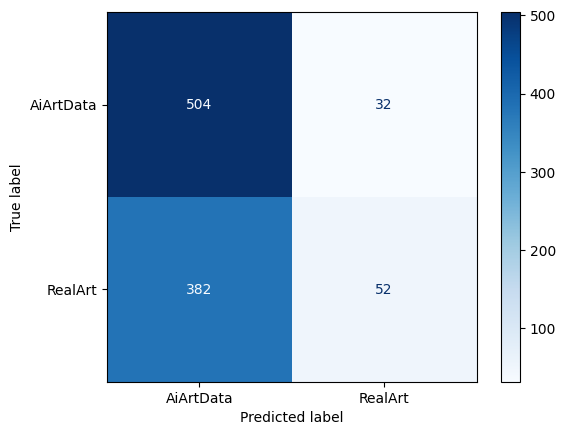

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    labels.cpu(),
    predictions.cpu(),
    display_labels=categories,
    cmap=plt.cm.Blues
)
plt.show()

In [ ]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [ ]:
excluded_models = ["RN50x64", "RN50x16", "RN50x4", "ViT-L/14@336px"]
model_names = [name for name in clip.available_models() if not any(excl in name for excl in excluded_models)]

results = {}

for model_name in model_names:
    print(f"Evaluating {model_name}...")

    model, preprocess = clip.load(model_name)
    model.cuda().eval()

    # Recompute features and predictions
    with torch.no_grad():
        image_features = model.encode_image(images)
        text_features = model.encode_text(text_tokens)

        # Normalize features
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Calculate similarity and predictions
        similarity = image_features @ text_features.T
        predictions = similarity.argmax(dim=-1)

    # Compute accuracy
    correct = (predictions == labels).sum().item()
    accuracy = correct / len(labels)
    results[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

# Display results
print("\nModel Comparison Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


Evaluating RN50...


100%|███████████████████████████████████████| 244M/244M [00:03<00:00, 74.8MiB/s]


Accuracy for RN50: 0.5794
Evaluating RN101...


100%|███████████████████████████████████████| 278M/278M [00:14<00:00, 20.8MiB/s]


Accuracy for RN101: 0.5990
Evaluating ViT-B/32...
Accuracy for ViT-B/32: 0.5732
Evaluating ViT-B/16...


100%|████████████████████████████████████████| 335M/335M [00:02<00:00, 131MiB/s]


Accuracy for ViT-B/16: 0.5701
Evaluating ViT-L/14...


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.90 GiB. GPU 0 has a total capacity of 14.75 GiB of which 845.06 MiB is free. Process 5385 has 13.92 GiB memory in use. Of the allocated memory 9.35 GiB is allocated by PyTorch, and 4.44 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

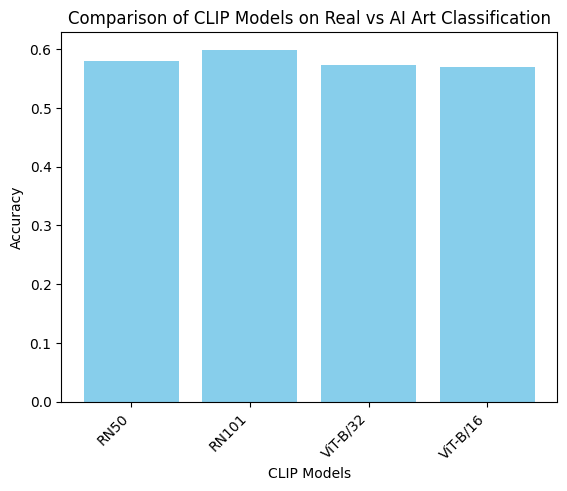

In [ ]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = list(results.values())

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("CLIP Models")
plt.ylabel("Accuracy")
plt.title("Comparison of CLIP Models on Real vs AI Art Classification")
plt.xticks(rotation=45, ha="right")
plt.show()